## Case Study: Credit Card Fraud Detection

Fraud detection is a popular application of anomaly detection. Since the instances of fraud cases is so minimal compared to non-fraud, there is a need to use outlier detection. In this tutorial, we will go over a popular dataset known as the "Credit Card Fraud Detection" dataset.

Here are some features of the dataset:


*   Contains 284k transactions in Europe of various of amounts using their credit card
*   Each transaction categorized with 2 classes: Fraud and non fraud

* Features include amount per trasaction. Most features have been anonymized due to confidentiality issues. Anonymization was done using Prinicpal Component Analysis.  

* Huge imbalance with dataset, only 0.172% of cases are considered fraudulent.

* Need to deal with imbalance using correct metrics (i.e., no accuracy)



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Change PATH to working directory on Google Drive
PATH = "/content/drive/MyDrive/AnomalyDetectionProjects"
# PATH = ""

In [ ]:
# Read in dataset
cc_df = pd.read_csv(PATH + "creditcard.csv")

In [ ]:
# Take a look
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check to see any null values
cc_df.isnull().sum().max()

0

In [ ]:
#shuffling our dataset
cc_df = cc_df.sample(frac=1,random_state=42)

In [ ]:
# Downsample
positive = cc_df[cc_df["Class"]== 1]
negative = cc_df[cc_df["Class"]== 0]

cc_df = pd.concat([positive,negative[:10000]])


Text(0.5, 1.0, 'Pie chart of Fraud and Non Fraud')

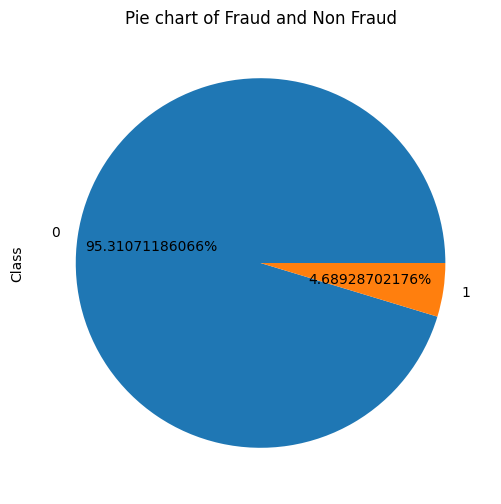

In [ ]:
# Create a pie chart
m = cc_df['Class'].value_counts()
m.plot(kind ='pie', autopct = '%1.11f%%', figsize = (12,6))
plt.title('Pie chart of Fraud and Non Fraud')

In [ ]:
1# Describe features
# (Take a look at the range of Time and Amount)
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,...,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000,10492.000000
mean,93825.674609,-0.248065,0.163199,-0.323417,0.208534,-0.139020,-0.087519,-0.248781,0.035320,-0.117522,...,0.031979,0.004275,0.002683,-0.004319,0.015481,0.004856,0.013363,-0.001296,88.330426,0.046893
std,47353.385051,2.656269,2.127812,2.576697,1.778622,1.932421,1.404578,2.267809,1.815642,1.314033,...,1.059517,0.772107,0.703898,0.605458,0.536072,0.478739,0.489240,0.337553,233.740105,0.211419
min,0.000000,-33.669917,-48.060856,-31.103685,-5.560118,-23.611865,-20.869626,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-22.575000,-2.824849,-4.781606,-1.476146,-8.260909,-6.328503,0.000000,0.000000
25%,53446.750000,-1.002719,-0.567886,-1.065396,-0.799015,-0.744983,-0.813324,-0.629472,-0.210698,-0.713745,...,-0.226156,-0.540509,-0.171307,-0.361846,-0.305925,-0.319008,-0.070876,-0.052916,5.000000,0.000000
50%,83840.000000,-0.089110,0.110964,0.120053,0.044595,-0.071501,-0.311324,0.006673,0.025637,-0.088960,...,-0.019917,0.015610,-0.017662,0.041733,0.037920,-0.045524,0.002992,0.011512,21.250000,0.000000
75%,138517.750000,1.285012,0.899053,0.992261,0.888415,0.616646,0.351353,0.556440,0.352019,0.560685,...,0.203249,0.530817,0.147021,0.434419,0.360404,0.253447,0.106004,0.084959,78.857500,0.000000
max,172782.000000,2.370633,22.057729,3.818495,12.699542,29.016124,16.493227,21.437514,20.007208,10.370658,...,27.202839,8.361985,22.083545,3.378881,6.070850,2.952093,9.200883,15.619041,5239.500000,1.000000


Data preprocessing steps

In [ ]:
# Scale amount and drop time
from sklearn.preprocessing import StandardScaler
cc_df['Amount'] = StandardScaler().fit_transform(cc_df[['Amount']])
cc_df = cc_df.drop(["Time"], axis = 1)

In [ ]:
# Get X and y
X, y = cc_df.drop(["Class"],axis=1), cc_df["Class"]

In [ ]:
# Install pyod
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=8caf459f1dad6b1c66a176b5fd6447bcdf45933427f99d05046e630b0fc3988b
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


**One class Support Vector Machines (OCSVM)**



* Unsupervised algorithm   
* Built upon traditional SVMs
*   Focus on finding the boundary or hypersphere (not hyperplane) for the "normal" class and the rest (outliers)
* Seeks to find smallest possible hypersphere (not like SVMs)

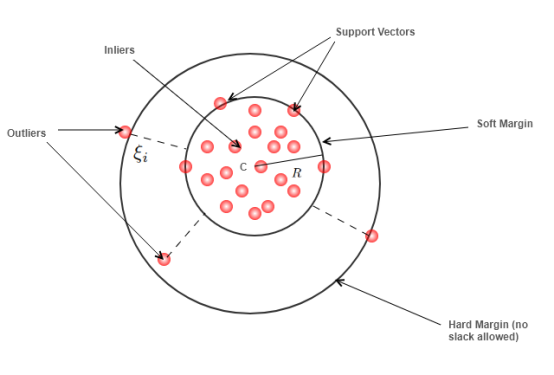

In [ ]:
from pyod.models.ocsvm  import OCSVM

In [ ]:
# train OCSVM detector
clf_name = 'OCSVM'
clf = OCSVM(contamination= 0.04)
clf.fit(X,)
# get the prediction label and outlier scores of the data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
OCSVM ROC:0.9475, precision @ rank n:0.6524


In [ ]:
from pyod.models.knn  import KNN

In [ ]:
# train kNN detector
clf_name = 'KNN'
clf = KNN(contamination=0.04, n_neighbors = 5)
clf.fit(X,)
# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
KNN ROC:0.9138, precision @ rank n:0.4431


**Autoencoders**



*   Trained to learn a representation of the data and then work to reconstruct it
*   For anomaly detection, autoencoders may struggle to reconstruct the abnormal data points which is how they will be identified.   

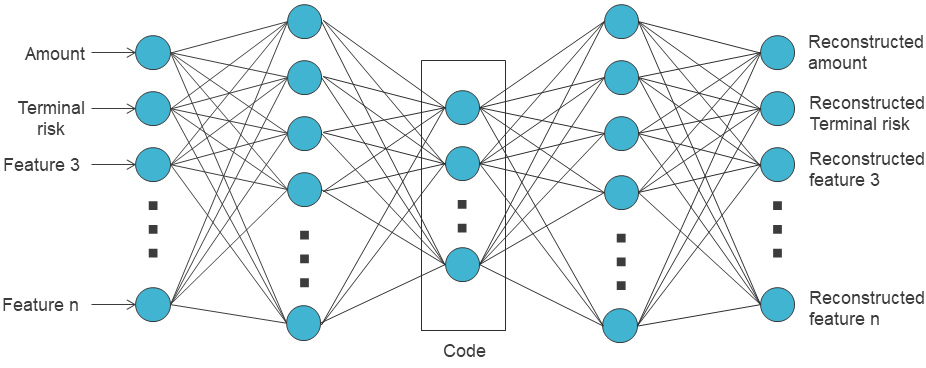

In [ ]:
from pyod.models.auto_encoder  import AutoEncoder

In [ ]:
# train kNN detector
clf_name = 'AutoEncoder'
contamination = 0.04  # percentage of outliers
clf = AutoEncoder(hidden_neurons =[15, 10, 6, 2, 2, 6, 10, 15], contamination=contamination, epochs = 10)
clf.fit(X,)
# get the prediction label and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dropout (Dropout)           (None, 29)                0         
                                                                 
 dense_1 (Dense)             (None, 29)                870       
                                                                 
 dropout_1 (Dropout)         (None, 29)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                450       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
from pyod.utils.data import evaluate_print

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y, y_train_scores)


On Training Data:
AutoEncoder ROC:0.9364, precision @ rank n:0.6118
